# Exercícios: Limpeza e Preparação dos Dados

### Instalação Extra - Para Importação de Arquivo Excel

In [1]:
!pip install openpyxl

#### Carga da Base de Dados Sintética

Utilizaremos, nessa aula, uma base de dados sintética, inspirada na base de dados da aula anterior, para fins didádicos.<br>

In [2]:
import pandas as pd
from pandas import DataFrame

arquivo = './data/df_inativos_sintetica.json'

df_inativos = pd.read_json(arquivo)
df_inativos

,Ano,OrgN1,OrgN2,Valor
0,2015,MINISTERIO DA SAUDE,AGENCIA NACIONAL DE SAUDE SUPLEMENTAR,540948943
1,2016,MINISTERIO DA SAUDE,AGENCIA NACIONAL DE SAUDE SUPLEMENTAR,567996390.2
2,2017,MINISTERIO DA SAUDE,AGENCIA NACIONAL DE SAUDE SUPLEMENTAR,AUSENTE
3,2018,MINISTERIO DA SAUDE,AGENCIA NACIONAL DE SAUDE SUPLEMENTAR,626216020.1
4,2019,MINISTERIO DA SAUDE,AGENCIA NACIONAL DE SAUDE SUPLEMENTAR,657526821.1
5,2020,MINISTERIO DA SAUDE,AGENCIA NACIONAL DE SAUDE SUPLEMENTAR,690403162.2
6,2021,MINISTERIO DA SAUDE,AGENCIA NACIONAL DE SAUDE SUPLEMENTAR,None
7,2015,MINISTERIO DO MEIO AMBIENTE,INSTITUTO BRASILEIRO DO MEIO AMBIENTE E DOS RE...,41006442494
8,2016,MINISTERIO DO MEIO AMBIENTE,INSTITUTO BRASILEIRO DO MEIO AMBIENTE E DOS RE...,43056764619
9,2017,MINISTERIO DO MEIO AMBIENTE,INSTITUTO BRASILEIRO DO MEIO AMBIENTE E DOS RE...,45209602850


#### Limpeza de Dados

O trabalho do analista de dados é feito, muitas vezes, em bases de dados fornecidas por terceiros em que não há garantia de consistência e completude. A presença de dados duplicados ou incompletos pode prejudicar o resultado da análise realizada, portanto é necessário fazer certas verificações preliminares.<br>

##### Verificando por Duplicatas

Primeiramente, liste as linhas duplicadas na base de dados.

In [3]:
df_inativos[df_inativos.duplicated()]

,Ano,OrgN1,OrgN2,Valor
21,2019,MINISTERIO DA SAUDE,AGENCIA NACIONAL DE SAUDE SUPLEMENTAR,657526821.1
22,2018,MINISTERIO DO MEIO AMBIENTE,INSTITUTO BRASILEIRO DO MEIO AMBIENTE E DOS RE...,47470082992
23,2019,MINISTERIO DA EDUCACAO,FUNDACAO UNIVERSIDADE DE BRASILIA,46074596819


Crie um novo dataframe eliminando as linhas de dados duplicadas e verifique não haver mais linhas duplicadas.

In [4]:
df_inativos = df_inativos.drop_duplicates()
df_inativos[df_inativos.duplicated()]

,Ano,OrgN1,OrgN2,Valor


##### Verificando Valores Nulos e Faltantes

Liste, se existirem, as linhas com valores nulos na coluna valor da base.

In [5]:
df_inativos[df_inativos['Valor'].isna()]

,Ano,OrgN1,OrgN2,Valor
6,2021,MINISTERIO DA SAUDE,AGENCIA NACIONAL DE SAUDE SUPLEMENTAR,None
13,2021,MINISTERIO DO MEIO AMBIENTE,INSTITUTO BRASILEIRO DO MEIO AMBIENTE E DOS RE...,None
16,2017,MINISTERIO DA EDUCACAO,FUNDACAO UNIVERSIDADE DE BRASILIA,None


Utilize o método map() e uma função lambda para testar e filtrar as linhas do DataFrame cujos valores sejam textuais e diferentes de None, a fim de identificar eventuais valores inválidos presentes na coluna Valor.

In [6]:
df_inativos[df_inativos.Valor.map(lambda x: True if (str(x).isalpha() and x is not None) else False)]

,Ano,OrgN1,OrgN2,Valor
2,2017,MINISTERIO DA SAUDE,AGENCIA NACIONAL DE SAUDE SUPLEMENTAR,AUSENTE
20,2021,MINISTERIO DA EDUCACAO,FUNDACAO UNIVERSIDADE DE BRASILIA,AUSENTE


Substitua o valor inválido identificado na base por None.

In [7]:
df_inativos=df_inativos.replace('AUSENTE',None)

Verifique, por meio do atributo "dtypes" do DataFrame, o tipo de dados da coluna Valor.

In [8]:
df_inativos.dtypes

Ano       int64
OrgN1    object
OrgN2    object
Valor    object
dtype: object

Note que o tipo de dados da coluna Valor é object uma vez que, quando da importação, havia strings no campo.<br>
Utilize o método "astype(float)" para converter a coluna para o tipo numérico float. Verifique novamente os tipos de dados das colunas do DataFrame.<br>
Se necessário, consulte a documentação do método: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html

In [9]:
df_inativos.Valor=df_inativos.Valor.astype(float)
df_inativos.dtypes

Ano        int64
OrgN1     object
OrgN2     object
Valor    float64
dtype: object

#### Tratamento de Valores Faltantes

Há várias possíveis estratégias para tratar dados faltantes.<br>
A melhor solução, nem sempre viável, é solicitar ao responsável pela disponibilização da base de dados que apresente os dados completos.<br>
Caso isso não seja possível ou caso os valores estejam ausentes na base original, é inevitável que haja alguma imprecisão na análise.<br>
Dependendo do contexto pode ser aceitável imputar valores aos dados faltantes e isso pode ser feito por diversos métodos.

Vamos ilustrá-los nos dados referentes "AGENCIA NACIONAL DE SAUDE SUPLEMENTAR".

In [10]:
df_inativos_ans = df_inativos[df_inativos.OrgN2=="AGENCIA NACIONAL DE SAUDE SUPLEMENTAR"]
df_inativos_ans

,Ano,OrgN1,OrgN2,Valor
0,2015,MINISTERIO DA SAUDE,AGENCIA NACIONAL DE SAUDE SUPLEMENTAR,540948943.0
1,2016,MINISTERIO DA SAUDE,AGENCIA NACIONAL DE SAUDE SUPLEMENTAR,567996390.2
2,2017,MINISTERIO DA SAUDE,AGENCIA NACIONAL DE SAUDE SUPLEMENTAR,NaN
3,2018,MINISTERIO DA SAUDE,AGENCIA NACIONAL DE SAUDE SUPLEMENTAR,626216020.1
4,2019,MINISTERIO DA SAUDE,AGENCIA NACIONAL DE SAUDE SUPLEMENTAR,657526821.1
5,2020,MINISTERIO DA SAUDE,AGENCIA NACIONAL DE SAUDE SUPLEMENTAR,690403162.2
6,2021,MINISTERIO DA SAUDE,AGENCIA NACIONAL DE SAUDE SUPLEMENTAR,NaN


Utiize o método apropriado para substituir os valores faltantes por zero, sem sobrescrever o DataFrame Original.

In [11]:
df_inativos_ans.Valor.fillna(0)

0    540948943.0
1    567996390.2
2            0.0
3    626216020.1
4    657526821.1
5    690403162.2
6            0.0
Name: Valor, dtype: float64

Outra possibilidade é utilizar o valor da linha anterior para preencher os valores faltantes, sem sobrescrever o DataFrame Original.

In [12]:
df_inativos_ans.Valor.ffill()

0    540948943.0
1    567996390.2
2    567996390.2
3    626216020.1
4    657526821.1
5    690403162.2
6    690403162.2
Name: Valor, dtype: float64

Um outro método disponível no DataFrame é o interpolate(), que utiliza os valores existentes para calcular um valor intermediário, com base nos valores presentes na base.<br>
Substitua os valores faltantes utilizando o método iterpolate(), sobrescrevendo o DataFrame Original.
Se necesário, consulte a documentação em: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html

In [34]:
df_inativos_ans['Valor'].interpolate(inPlace=True)
df_inativos_ans

,Ano,OrgN1,OrgN2,Valor
0,2015,MINISTERIO DA SAUDE,AGENCIA NACIONAL DE SAUDE SUPLEMENTAR,5.409489e+08
1,2016,MINISTERIO DA SAUDE,AGENCIA NACIONAL DE SAUDE SUPLEMENTAR,5.679964e+08
2,2017,MINISTERIO DA SAUDE,AGENCIA NACIONAL DE SAUDE SUPLEMENTAR,5.971062e+08
3,2018,MINISTERIO DA SAUDE,AGENCIA NACIONAL DE SAUDE SUPLEMENTAR,6.262160e+08
4,2019,MINISTERIO DA SAUDE,AGENCIA NACIONAL DE SAUDE SUPLEMENTAR,6.575268e+08
5,2020,MINISTERIO DA SAUDE,AGENCIA NACIONAL DE SAUDE SUPLEMENTAR,6.904032e+08
6,2021,MINISTERIO DA SAUDE,AGENCIA NACIONAL DE SAUDE SUPLEMENTAR,6.904032e+08


Note que cada um dos métodos propostos resultará em valores distintos que podem não guardar relação com os valores reais.<br>
A imputação de valores, se realizada, deve ser documentada e explicitada quando da apresentação do resultado da análise de dados.

#### Transformação de Dados

Considerando os valores dos anos presentes na base, crie uma coluna indicando a faixa de década referente ao dado. Ex: 2000,2010,2020,2030
Utilize o método cut apresentado na aula.


In [14]:
df_inativos['Década'] =pd.cut(df_inativos.Ano,[2000,2009,2019,2029],right = True, include_lowest=True,labels=[2000,2010,2020])
df_inativos

,Ano,OrgN1,OrgN2,Valor,Década
0,2015,MINISTERIO DA SAUDE,AGENCIA NACIONAL DE SAUDE SUPLEMENTAR,5.409489e+08,2010
1,2016,MINISTERIO DA SAUDE,AGENCIA NACIONAL DE SAUDE SUPLEMENTAR,5.679964e+08,2010
2,2017,MINISTERIO DA SAUDE,AGENCIA NACIONAL DE SAUDE SUPLEMENTAR,NaN,2010
3,2018,MINISTERIO DA SAUDE,AGENCIA NACIONAL DE SAUDE SUPLEMENTAR,6.262160e+08,2010
4,2019,MINISTERIO DA SAUDE,AGENCIA NACIONAL DE SAUDE SUPLEMENTAR,6.575268e+08,2010
5,2020,MINISTERIO DA SAUDE,AGENCIA NACIONAL DE SAUDE SUPLEMENTAR,6.904032e+08,2020
6,2021,MINISTERIO DA SAUDE,AGENCIA NACIONAL DE SAUDE SUPLEMENTAR,NaN,2020
7,2015,MINISTERIO DO MEIO AMBIENTE,INSTITUTO BRASILEIRO DO MEIO AMBIENTE E DOS RE...,4.100644e+10,2010
8,2016,MINISTERIO DO MEIO AMBIENTE,INSTITUTO BRASILEIRO DO MEIO AMBIENTE E DOS RE...,4.305676e+10,2010
9,2017,MINISTERIO DO MEIO AMBIENTE,INSTITUTO BRASILEIRO DO MEIO AMBIENTE E DOS RE...,4.520960e+10,2010


Utiilize as seguintes tabelas para converter as coluna 'OrgN1' e 'OrgN2' para as siglas que os identificam.
<table>
    <tr>
        <th>Ministério</th>
        <th>SIGLA</th>
    </tr>
    <tr>
        <td>MINISTERIO DA SAUDE</td>
        <td>MS</td>
    </tr>
    <tr>
        <td>MINISTERIO DA EDUCACAO</td>
        <td>MEC</td>
    </tr>
    <tr>
        <td>MINISTERIO DO MEIO AMBIENTE'</td>
        <td>MMA</td>
    </tr>
</table>
<table>
    <tr>
        <th>Órgão</th>
        <th>SIGLA</th>
    </tr>
    <tr>
        <td>AGENCIA NACIONAL DE SAUDE SUPLEMENTAR</td>
        <td>ANS</td>
    </tr>
    <tr>
        <td>FUNDACAO UNIVERSIDADE DE BRASILIA</td>
        <td>FUB</td>
    </tr>
    <tr>
        <td>INSTITUTO BRASILEIRO DO MEIO AMBIENTE E DOS RECURSOS NATURAIS RENOVAVEIS</td>
        <td>IBAMA</td>
    </tr>
</table>

In [15]:
mapa_org1 = { 'MINISTERIO DA SAUDE':'MS', 'MINISTERIO DA EDUCACAO':'MEC','MINISTERIO DO MEIO AMBIENTE':'MMA'}
mapa_org2 = { 'AGENCIA NACIONAL DE SAUDE SUPLEMENTAR': 'ANS','FUNDACAO UNIVERSIDADE DE BRASILIA':'FUB','INSTITUTO BRASILEIRO DO MEIO AMBIENTE E DOS RECURSOS NATURAIS RENOVAVEIS':'IBAMA' }
df_inativos['OrgN1'] = df_inativos['OrgN1'].map(mapa_org1)
df_inativos['OrgN2'] = df_inativos['OrgN2'].map(mapa_org2)
df_inativos

,Ano,OrgN1,OrgN2,Valor,Década
0,2015,MS,ANS,5.409489e+08,2010
1,2016,MS,ANS,5.679964e+08,2010
2,2017,MS,ANS,NaN,2010
3,2018,MS,ANS,6.262160e+08,2010
4,2019,MS,ANS,6.575268e+08,2010
5,2020,MS,ANS,6.904032e+08,2020
6,2021,MS,ANS,NaN,2020
7,2015,MMA,IBAMA,4.100644e+10,2010
8,2016,MMA,IBAMA,4.305676e+10,2010
9,2017,MMA,IBAMA,4.520960e+10,2010


### Indicadores Criminais RS - Excel

#### Leitura de Arquivo Excel

O módulo Pandas permite a leitura de diversos formatos de arquivos, inclusive planilhas Excel, muito utilizadas para o armazenamento e publicação de pequenas bases de dados.<br>
A base de indicadores criminais por município e ano do Estado do Rio Grande do Sul, publicada no endereço https://ssp.rs.gov.br/indicadores-criminais, é publicada no formato Excel.<br>
O arquivo contém dados consolidados na planilha denominada "Geral" e dados para cada município com periodicidade anual e mensal.<br>
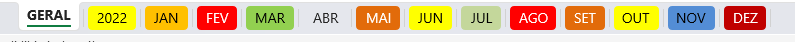

O arquivo de 2022 está localizado no seguinte arquivo:

In [16]:
arquivo_2022 =  "./data/indicadores_criminais_rs/14101106-site-geral-e-municipios-ano-2022-atualizado-em-04-set-2023-dados-cvli-atualizado-publicacao.xlsx"

Leia a documentação do método pandas.read_excel(), disponível no endereço https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html, e escreva uma função para ler os dados da planilha "2022", que contém os indicadores separados por município consolidados no ano.<br>
Note que os dados, com o cabeçalho, se iniciam na linha 12 da planilha:
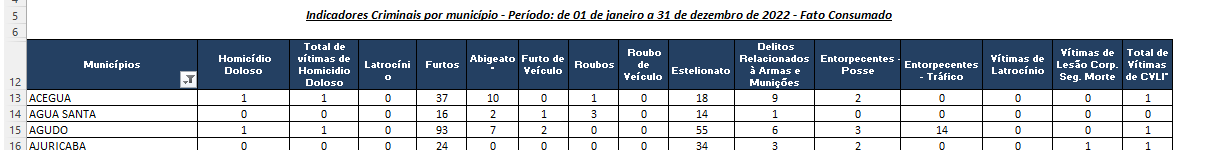<br>
Utilize os parâmetros sheet_name, skiprows, nrows e header para especificar as linhas da planilha que deverão ser importadas. Liste o nome das colunas do DataFrame.

In [17]:
import pandas as pd
from pandas import DataFrame

df_2022 =  pd.read_excel(arquivo_2022,sheet_name='2022', skiprows=10, header=1,nrows=497)
df_2022.columns

Index(['Municípios', ' Homicídio  Doloso',
       'Total de vítimas de Homicidio Doloso', ' Latrocínio', ' Furtos',
       'Abigeato*', 'Furto de Veículo ', ' Roubos', ' Roubo de Veículo',
       ' Estelionato', ' Delitos Relacionados à Armas e Munições',
       ' Entorpecentes - Posse', ' Entorpecentes - Tráfico',
       'Vítimas de Latrocínio', 'Vítimas de Lesão Corp. Seg. Morte',
       'Total de Vítimas de CVLI*'],
      dtype='object')

In [18]:
!pip install openpyxl

Utilizando as duas funções a seguir, que retornam uma lista dos arquivos excel presentes na pasta e o ano referente a cada um deles, escreva um programa para ler todos os arquivos e agrupar os dados em um mesmo DataFrame utilizando o método DataFrame.concat().<br>
Lembre-se de acrescentar uma coluna informando o ano a que se refere cada linha antes de juntar os dados.

In [19]:
import os
import glob

def lista_arquivos_xlsx(diretorio='./data/indicadores_criminais_rs/'):
    return(glob.glob(os.path.join(diretorio, '*.xlsx')))

def ano_arquivo(nome_arquivo):
    parte6 = (nome_arquivo.split('-')[6])
    
    if  (parte6).isdecimal():
        return parte6
    else:
        return (nome_arquivo.split('-')[5])

In [20]:
def le_baseRS():
    df_consolidado = DataFrame()
    for arquivo in lista_arquivos_xlsx():
        ano = ano_arquivo(arquivo)
        df_ano = pd.read_excel(arquivo,sheet_name=ano, skiprows=10, header=1,nrows=497)
        df_ano['ano']=ano
        df_consolidado = pd.concat([df_consolidado,df_ano])
    return df_consolidado

df_crimesRS = le_baseRS()

Verifique o nome das colunas do DataFrame resultante. O número de colunas é o esperado?<br>

In [21]:
df_crimesRS.columns

Index(['Municípios', ' Homicídio  Doloso',
       'Total de vítimas de Homicidio Doloso', ' Latrocínio', ' Furtos',
       'Abigeato*', 'Furto de Veículo ', ' Roubos', ' Roubo de Veículo',
       ' Estelionato', ' Delitos Relacionados à Armas e Munições',
       ' Entorpecentes - Posse', ' Entorpecentes - Tráfico',
       'Vítimas de Latrocínio', 'Vítimas de Lesão Corp. Seg. Morte', 'ano',
       ' Total de Vítimas de CVLI*', 'Total de Vítimas de CVLI*'],
      dtype='object')

Modifique o código para remover os espaços dos nomes do DataFrame lido antes de combiná-lo com o DataFrame consolidado.<br>
Verifique novamente o nome das colunas.<br>
Dica: utilize o método str.strip() no nome das colunas.

In [22]:
def le_baseRS():
    df_consolidado = DataFrame()
    for arquivo in lista_arquivos_xlsx():
        ano = ano_arquivo(arquivo)
        df_ano = pd.read_excel(arquivo,sheet_name=ano, skiprows=10, header=1,nrows=497)
        df_ano.columns = [ str.strip(column_name) for column_name in df_ano.columns]
        df_ano['ano']=ano
        df_consolidado = pd.concat([df_consolidado,df_ano])
    return df_consolidado

df_crimesRS = le_baseRS()

df_crimesRS.columns

Index(['Municípios', 'Homicídio  Doloso',
       'Total de vítimas de Homicidio Doloso', 'Latrocínio', 'Furtos',
       'Abigeato*', 'Furto de Veículo', 'Roubos', 'Roubo de Veículo',
       'Estelionato', 'Delitos Relacionados à Armas e Munições',
       'Entorpecentes - Posse', 'Entorpecentes - Tráfico',
       'Vítimas de Latrocínio', 'Vítimas de Lesão Corp. Seg. Morte', 'ano',
       'Total de Vítimas de CVLI*'],
      dtype='object')

Exiba a soma da quantidade total vítimas de homicídio doloso registrados na base de dados:

In [23]:
df_crimesRS['Homicídio  Doloso'].sum()

22929

Utilizando o metodo isnull(), verifique se há valores nulos em alguma das colunas da base:

In [24]:
df_crimesRS.isnull().any()

Municípios                                 False
Homicídio  Doloso                          False
Total de vítimas de Homicidio Doloso       False
Latrocínio                                 False
Furtos                                     False
Abigeato*                                  False
Furto de Veículo                           False
Roubos                                     False
Roubo de Veículo                           False
Estelionato                                False
Delitos Relacionados à Armas e Munições    False
Entorpecentes - Posse                      False
Entorpecentes - Tráfico                    False
Vítimas de Latrocínio                      False
Vítimas de Lesão Corp. Seg. Morte          False
ano                                        False
Total de Vítimas de CVLI*                   True
dtype: bool

Utilizando o método drop_duplicates(), liste os anos nos quais a coluna 'Total de Vítimas de CVLI*' possui valores nulos.<br>
Em seguida, verifique nas planilhas originais se a coluna estava presente nesses anos.

In [25]:
df_crimesRS[df_crimesRS['Total de Vítimas de CVLI*'].isna()][[ 'Total de Vítimas de CVLI*','ano']].drop_duplicates()

,Total de Vítimas de CVLI*,ano
0,NaN,2018
0,NaN,2019
0,NaN,2017
0,NaN,2016
0,NaN,2015
0,NaN,2014
0,NaN,2013
0,NaN,2012


Elimine a coluna que possui valores nulos e armazene a DataFrame em um arquivo denominado "df_crimesRS.json" para uso nas próximas aulas.

In [26]:
df_crimesRS = df_crimesRS.drop('Total de Vítimas de CVLI*', axis=1)

In [27]:
df_crimesRS=df_crimesRS.reset_index()
df_crimesRS.to_json('df_crimesRS.json')